In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import scipy.optimize
import numdifftools as nd
from numdifftools import Jacobian, Hessian
sns.set()

In [120]:
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [121]:
# BYMARKEDER
df = pd.read_csv("https://raw.githubusercontent.com/Oliverkobaek/thesis_2020/master/Bresnahan/by%20markeder/Bresnahan_data_by.csv")

# KOMMUNEMARKEDER
#df = pd.read_csv("https://raw.githubusercontent.com/Oliverkobaek/thesis_2020/master/Bresnahan/Bresnahan_data_full_l%C3%A6s%C3%B8.csv")

df = df.drop(['Unnamed: 0'], axis=1)

In [97]:
df = pd.read_excel("test.xlsx")
df  = df.drop(['Unnamed: 0'], axis=1)

In [118]:
df.equals(df_test)

False

In [117]:
df.describe()

,Kommune,By_befolkning,ALDER,d65,d17,samlet_ind,Besk,Besk1864,DK,Befolkning,markedsvaerdix,År,antal_apo,receptgrænse,logbefolkning,logmarkedsvalue,logindkomst,yderkom,yder_mono
count,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00
mean,526.15,16725.51,42.44,0.21,0.20,181179.85,0.48,0.75,0.90,72408.89,1233300.24,2016.87,1.17,308950.70,16.73,12.33,1.81,0.28,0.25
std,220.48,56051.22,2.32,0.03,0.02,23049.18,0.03,0.04,0.04,73601.74,378670.07,1.15,2.25,7903.38,56.05,3.79,0.23,0.45,0.43
min,101.00,1032.00,35.36,0.10,0.14,131247.17,0.40,0.63,0.60,3345.00,593799.39,2010.00,0.00,263885.77,1.03,5.94,1.31,0.00,0.00
25%,330.00,1845.00,40.90,0.19,0.19,167687.24,0.47,0.73,0.89,39572.00,1005408.46,2016.00,0.00,302762.97,1.84,10.05,1.68,0.00,0.00
50%,550.00,3600.00,42.46,0.21,0.20,177336.55,0.49,0.75,0.91,50452.00,1173212.37,2017.00,1.00,309777.99,3.60,11.73,1.77,0.00,0.00
75%,746.00,9012.00,43.72,0.23,0.22,190056.62,0.50,0.78,0.92,75805.00,1341594.44,2018.00,1.00,316955.54,9.01,13.42,1.90,1.00,0.00
max,860.00,613288.00,51.67,0.36,0.25,338035.82,0.56,0.85,0.95,623404.00,3844003.31,2018.00,26.00,316955.54,613.29,38.44,3.38,1.00,1.00


In [100]:
df_test.describe()

,Kommune,By_befolkning,ALDER,d65,d17,samlet_ind,Besk,Besk1864,DK,Befolkning,markedsvaerdix,År,antal_apo,receptgrænse,logbefolkning,logmarkedsvalue,logindkomst,yderkom,yder_mono
count,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00,1201.00
mean,526.15,16725.51,42.44,0.21,0.20,181179.85,0.48,0.75,0.90,72408.89,1233300.24,2016.87,1.17,308950.70,16.73,12.33,1.81,0.28,0.25
std,220.48,56051.22,2.32,0.03,0.02,23049.18,0.03,0.04,0.04,73601.74,378670.07,1.15,2.25,7903.38,56.05,3.79,0.23,0.45,0.43
min,101.00,1032.00,35.36,0.10,0.14,131247.17,0.40,0.63,0.60,3345.00,593799.39,2010.00,0.00,263885.77,1.03,5.94,1.31,0.00,0.00
25%,330.00,1845.00,40.90,0.19,0.19,167687.24,0.47,0.73,0.89,39572.00,1005408.46,2016.00,0.00,302762.97,1.84,10.05,1.68,0.00,0.00
50%,550.00,3600.00,42.46,0.21,0.20,177336.55,0.49,0.75,0.91,50452.00,1173212.37,2017.00,1.00,309777.99,3.60,11.73,1.77,0.00,0.00
75%,746.00,9012.00,43.72,0.23,0.22,190056.62,0.50,0.78,0.92,75805.00,1341594.44,2018.00,1.00,316955.54,9.01,13.42,1.90,1.00,0.00
max,860.00,613288.00,51.67,0.36,0.25,338035.82,0.56,0.85,0.95,623404.00,3844003.31,2018.00,26.00,316955.54,613.29,38.44,3.38,1.00,1.00


In [122]:
df['receptgrænse'] = 270000*1.02317**(df['År']-2011)

år = list(range(2008,2019))
# vi har indsat 0 i år efter 2015 for at sikre at disse markeder ikke er restrikteret
gnsrecept = [13.1, 13.12, 13.19, 13.13, 13.24, 13.26, 13.53, 13.13, float("inf") ,float("inf") ,float("inf")]
gnsreceptdic = {}
for i in range(len(gnsrecept)):
    gnsreceptdic[år[i]] = gnsrecept[i]
    
restriction = []

for år in range(2008,2019):
    liste = list((df['By_befolkning'][df['År']==år]*gnsreceptdic[år]-df['receptgrænse'][df['År']==år]*df['antal_apo'][df['År']==år])>=df['receptgrænse'][df['År']==år])
    #liste = list((df['Befolkning'][df['År']==år]*gnsreceptdic[år]-df['receptgrænse'][df['År']==år]*df['antal_apo'][df['År']==år])>=df['receptgrænse'][df['År']==år])
    for i in liste:
        restriction.append(i)
        
df['restriction'] = restriction

In [124]:
## FIX YDERKOMMUNER ##
df_komkode_yder = pd.read_excel('kommunerkoderyder.xlsx')
df = df.merge(df_komkode_yder, on = "Kommune")
df  = df.drop('yderkom', axis = 1)
df = df.rename(columns={'Yderkommuner':'yderkom'})

In [125]:
df['yder_mono'] = ((df['antal_apo']<=1)* (df['yderkom']==1))
df['yder_mono'] = df['yder_mono'].astype(int)

C:\Users\Oliver\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [123]:
# KOMMUNER
#df['logbefolkning'] = df['Befolkning']/1000#df['By_befolkning']/1000

# BYMARKEDER
df['logbefolkning'] = df['By_befolkning']/1000#


###
df['logmarkedsvalue'] = df['markedsvaerdix']/100000 #np.log()
df['logindkomst'] = df['samlet_ind']/100000 #np.log()

# Unrestricted markets
df = df[df['restriction']==True]

In [126]:
def V(df, Ni, alpha=np.ones(5), beta=np.ones(6)):
    """Per-capita variable profit
    
    df: data
    Ni: number of incumbents in market i
    alpha: alpha parameters
    beta: beta parameter
    """
    n = np.min([5, Ni])
#     n = Ni
    a = 0
    for i in range(1,n):
        a = a + alpha[i]
    

    Z = np.c_[df.d65, df.d17, df.logindkomst, df.Besk1864, df.DK, df.yder_mono]# np.log(), 

    # W = df.LANDV
    # X = np.c_[W, Z]

    X = np.c_[Z]
    
    
    profit = alpha[0] + X @ beta - a
    return profit

def F(df, Ni, gamma=np.ones(5)):
    n = np.min([5, Ni])
#     n = Ni
    g = 0
    # gamma 2 through gamma 5 (indices 1 through 4)
    for i in range(1,n):
        g = g + gamma[i]

    fixed_cost = gamma[0] + gamma[5]*df.logmarkedsvalue + g
    return fixed_cost

#def S_func(df, lam):
def S_func(df, lam): #, lam
    S =   lam * df.logbefolkning #np.log() #
    return S


def neg_log_lik(theta=np.ones(18), market='antal_apo', df=df):#, df=None):
    lam = theta[0]
    beta = theta[1:7]
    alpha = theta[7:12]
    gamma = theta[12:18]
#    beta = theta[0:5]
#    alpha = theta[5:10]
#    gamma = theta[10:16]
    
    
    Phi = scipy.stats.norm.cdf
    
    S = S_func(df, lam) #, lam

    
    P = [0] * 6
    Pi_bar = lambda N: S * V(df, N, alpha=alpha, beta=beta) - F(df, N, gamma=gamma)
    P[0] = np.log( 1 - Phi(Pi_bar(0)) )
    P[5] = np.log( Phi(Pi_bar(5)) )
    for i in range(1,5):
        P[i] = np.log( Phi(Pi_bar(i)) - Phi(Pi_bar(i+1)) )

        
    for i in range(6):
        P[i][P[i] == -np.inf] = -100000000
    log_lik = 0 
    for i in range(5):
        log_lik = log_lik + np.sum(P[i] * (df[market] == i))
    log_lik = log_lik + np.sum(P[5] * (df[market] >= 5))
    return -log_lik


def theta_to_param_dict(theta):
    lam = theta[0]
    beta = theta[1:7]
    alpha = theta[7:12]
    gamma = theta[12:18]
#    beta = theta[0:5]
#    alpha = theta[5:10]
#    gamma = theta[10:16]
    
    
    d = {'lam': lam, 'beta': beta, 'alpha': alpha, 'gamma': gamma, 'theta': theta} 
    return d

In [127]:
theta0 = np.ones(18) * 0.1
neg_log_lik(df=df, theta=theta0)

C:\Users\Oliver\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Oliver\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log


2290.2812661716516

In [128]:
%%time
ba = [-np.inf] * 7
bb = [0] * 10
lower_bounds = [*ba, *bb, -np.inf]
upper_bounds = [np.inf] * 18
bounds = list(zip(lower_bounds, upper_bounds))


theta0 = np.ones(18) * 0.1
nll = lambda theta: neg_log_lik(theta=theta, df=df)
out = scipy.optimize.minimize(nll, theta0, bounds=bounds,
    options={'disp': False, 'maxiter': 10000}
    )

C:\Users\Oliver\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Oliver\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log


Wall time: 4min 18s


In [129]:
out

      fun: 835.2330334113908
 hess_inv: <18x18 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04199592, -0.02346496, -0.01373337,  0.09866881, -0.05250058,
        0.06868959, -0.01546141,  0.02960405,  0.03321929,  0.08604957,
        4.7640242 ,  0.12169039, -0.01781473,  0.07192966,  0.02386287,
        0.02172555,  0.11845032, -0.14098305])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 12825
      nit: 604
   status: 0
  success: True
        x: array([ 0.69846017,  0.49735754, -2.25235386, -0.07666384,  1.17407259,
       -0.03814686, -0.08151195,  0.17917916,  0.3435891 ,  0.05493999,
        0.        ,  0.01847188,  0.61856658,  1.37575894,  0.34626609,
        0.84410011,  0.01414324,  0.04702552])

In [130]:
Hfun = nd.Hessian(nll, full_output=True)
hessian_nd, info= Hfun(out['x'])
se = np.sqrt(np.diag(np.linalg.inv(hessian_nd)))
results = pd.DataFrame({'parameters':out['x'],'std err':se})
results.index=['lambda - befolkning','beta_1 - d65','beta_2 - d17','beta_3 - indkomst','beta_4 - besk','beta_5 - Foreigner', 'beta_6 - yderkom' ,'alpha_1','alpha_2','alpha_3','alpha_4','alpha_5','gamma_1','gamma_2','gamma_3','gamma_4','gamma_5', 'gamma_6 - Landvalue'] #,'gamma6' 


C:\Users\Oliver\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Oliver\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Oliver\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
C:\Users\Oliver\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in log


In [131]:
results

,parameters,std err
lambda - befolkning,0.70,0.25
beta_1 - d65,0.50,0.19
beta_2 - d17,-2.25,1.03
beta_3 - indkomst,-0.08,0.04
beta_4 - besk,1.17,0.49
beta_5 - Foreigner,-0.04,0.07
beta_6 - yderkom,-0.08,0.04
alpha_1,0.18,0.13
alpha_2,0.34,0.12
alpha_3,0.05,0.02


In [132]:
hat_theta = theta_to_param_dict(out.x)

In [133]:
def calcS(df, theta):
    d = theta_to_param_dict(theta)
    S_grid = np.zeros(5)
    
    dfm = df.mean()
    for i in range(5):
        n = i + 1
        S_grid[i] = F(dfm, n, d['gamma']) / V(dfm, n, d['alpha'], d['beta'])
        print(F(dfm, n, d['gamma']) )
        print(V(dfm, n, d['alpha'], d['beta']))
    return S_grid

S_vals = calcS(df, out.x)

1.1985324737271277
[0.5162789]
2.574291415294685
[0.17268981]
2.9205575035246993
[0.11774982]
3.7646576085437244
[0.11774982]
3.7788008476630095
[0.09927794]


In [134]:
S_vals

array([ 2.32148256, 14.90702591, 24.80307414, 31.97166352, 38.06284432])

In [135]:
table5A_left = pd.DataFrame({'Apoteker':S_vals}).T
table5A_left.columns = ['S_1', 'S_2', 'S_3', 'S_4', 'S_5']
table5A_left

,S_1,S_2,S_3,S_4,S_5
Apoteker,2.32,14.91,24.80,31.97,38.06


In [136]:
a = [S_vals[i+1]/S_vals[i] * ((i+1)/(i+2)) for i in range(4)]
table5A_right = pd.DataFrame(a).T
table5A_right.columns = ['s2/s1', 's3/s2', 's4/s3', 's5/s4']

In [137]:
table5A_right

,s2/s1,s3/s2,s4/s3,s5/s4
0,3.21,1.11,0.97,0.95


In [138]:
SN_S5_ratio = S_vals[5-1]* np.arange(1,5+1) / (S_vals * 5)

In [139]:
SN_S5_ratio

array([3.27918417, 1.02133972, 0.92076113, 0.95241449, 1.        ])

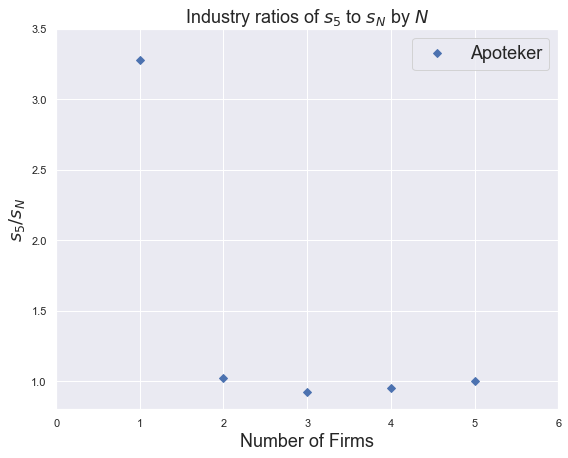

In [140]:
BIG = 18
fig = plt.figure(figsize=(9,7))
plt.plot([1,2,3,4,5], SN_S5_ratio, 'D', label='Apoteker')
ax = fig.get_axes()[0]
plt.legend(fontsize=BIG)
plt.xlim(0,6)
plt.ylim(0.8, 3.5)
plt.title('Industry ratios of $s_5$ to $s_N$ by $N$', fontsize=BIG)
plt.xlabel('Number of Firms', fontsize=BIG)
plt.ylabel('$s_5/s_N$', fontsize=BIG);
# ax.set_ylabel('$s_5/s_N$', fontsize=40)